<center>

# Diminuindo ruídos de imagens pela média das amostras
<div style="text-align: right;"><h3>
    Carlos Eduardo Cassimiro da Silva
</h3></div>

#### Reprodução da figura 2.26 do livro Processamento Digital de Imagens (Gonzalez, Rafael C.)

</center>
<br>

##### Roteiro
1. Utilizando métodos "implementados' <br>
 1.1. Adicionando Ruído Gaussiano <br>
 1.2. Redução do Ruído pelas Médias <br>
 1.3. Adicionando Ruído Sal e Pimenta <br>
 1.4. Redução do Ruídos pelas Médias
2. Ruídos com o módulo <i>imgaug</i> <br>
 2.1. Adicionando Ruído Gaussiano <br>
 2.2. Redução do Ruído pelas Médias <br>
 2.3. Adicionando Ruído Sal e Pimenta <br>
 2.4. Redução do Ruídos pelas Médias
 
 ##### Fonte da imagem
 DIP3E_CH02_Original_Images.zip <br>
 http://www.imageprocessingplace.com/DIP-3E/dip3e_book_images_downloads.htm

##### Módulos utilizados

In [1]:
import numpy as np
import random
#pip install opencv-python
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise

#### Imagem original

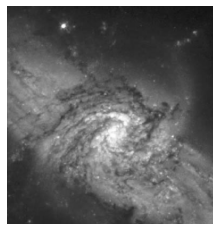

In [2]:
image = cv2.imread('imagens_originais/Fig0226(galaxy_pair_original).tif')

plt.axis("off")
plt.imshow(image);

## 1. Utilizando métodos "implementados'
### 1.1. Adicionando Ruído Gaussiano

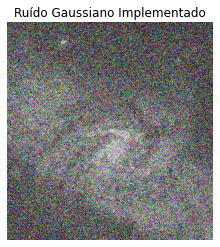

In [3]:
# Função baseada de:
# https://stackoverflow.com/questions/14435632/impulse-gaussian-and-salt-and-pepper-noise-with-opencv

image = cv2.imread('imagens_originais/Fig0226(galaxy_pair_original).tif')

def gaussian_noise(image, variance):
    # random_noise() method will convert image in [0, 255] to [0, 1.0],
    # inherently it use np.random.normal() to create normal distribution
    # and adds the generated noised back to image
    noise_img = random_noise(image, mode='gaussian', var=variance**0.5)
    noise_img = (255*noise_img).astype(np.uint8)
    
    return noise_img

noise_image = gaussian_noise(image, 0.25)
plt.axis("off")
plt.title("Ruído Gaussiano Implementado")
plt.imshow(noise_image);

### 1.2. Redução do Ruído pelas Médias

In [4]:
noise_image = []
for i in range(0,100):
    noise_image.append(gaussian_noise(image,0.25))

In [5]:
noise_image = np.array(noise_image)
noise_image = noise_image.astype(np.uint16)

noise_img_5 = sum(noise_image[0:5]) // len(noise_image[0:5])
noise_img_10 = sum(noise_image[0:10]) // len(noise_image[0:10])
noise_img_20 = sum(noise_image[0:20]) // len(noise_image[0:20])
noise_img_50 = sum(noise_image[0:50]) // len(noise_image[0:50])
noise_img_100 = sum(noise_image) // len(noise_image)

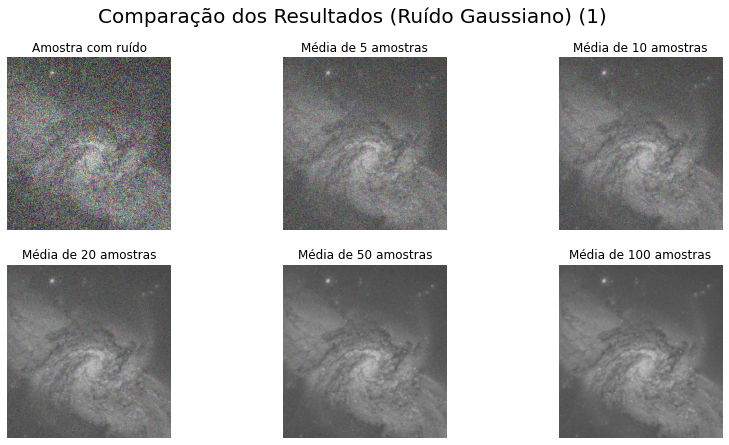

In [6]:
fig = plt.figure(figsize=(14,7))

fig.add_subplot(2,3,1); plt.axis('off')
plt.title('Amostra com ruído')
plt.imshow(noise_image[0])

fig.add_subplot(2,3,2); plt.axis('off')
plt.title('Média de 5 amostras')
plt.imshow(noise_img_5)

fig.add_subplot(2,3,3); plt.axis('off')
plt.title('Média de 10 amostras')
plt.imshow(noise_img_10)

fig.add_subplot(2,3,4); plt.axis('off')
plt.title('Média de 20 amostras')
plt.imshow(noise_img_20)

fig.add_subplot(2,3,5); plt.axis('off')
plt.title('Média de 50 amostras')
plt.imshow(noise_img_50)

fig.add_subplot(2,3,6); plt.axis('off')
plt.title('Média de 100 amostras')
plt.imshow(noise_img_100)

fig.suptitle('Comparação dos Resultados (Ruído Gaussiano) (1)', fontsize=20)
plt.show();

### 1.3. Adicionando Ruído Sal e Pimenta

In [7]:
# Função retirada de:
# https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv

def salt_pepper_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    threshold = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > threshold:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

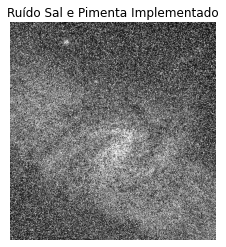

In [8]:
noise_img = salt_pepper_noise(image,0.2)
#cv2.imwrite('galaxy_noise/galaxy_noise.jpg', noise_img) # Salvar arquivo da imagem

plt.axis("off")
plt.title("Ruído Sal e Pimenta Implementado")
plt.imshow(noise_img);

### 1.4. Redução do Ruído pelas Médias

In [9]:
noise_image = []
for i in range(0,100):
    noise_image.append(salt_pepper_noise(image,0.25))

In [10]:
noise_image = np.array(noise_image)
noise_image = noise_image.astype(np.uint16)

noise_img_5 = sum(noise_image[0:5]) // len(noise_image[0:5])
noise_img_10 = sum(noise_image[0:10]) // len(noise_image[0:10])
noise_img_20 = sum(noise_image[0:20]) // len(noise_image[0:20])
noise_img_50 = sum(noise_image[0:50]) // len(noise_image[0:50])
noise_img_100 = sum(noise_image) // len(noise_image)

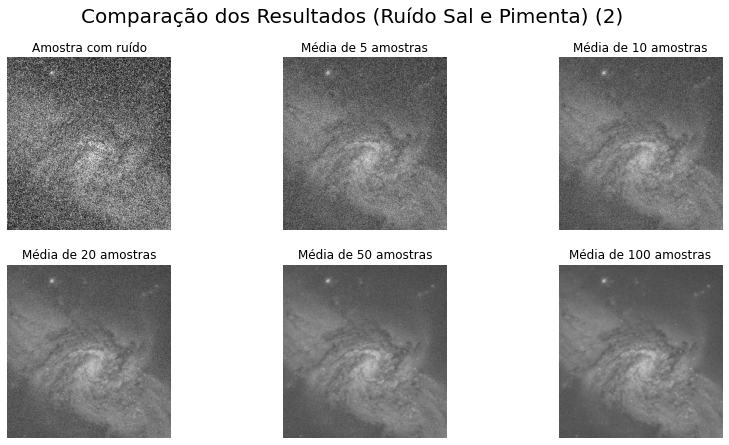

In [11]:
fig = plt.figure(figsize=(14,7))

fig.add_subplot(2,3,1); plt.axis('off')
plt.title('Amostra com ruído')
plt.imshow(noise_image[0])

fig.add_subplot(2,3,2); plt.axis('off')
plt.title('Média de 5 amostras')
plt.imshow(noise_img_5)

fig.add_subplot(2,3,3); plt.axis('off')
plt.title('Média de 10 amostras')
plt.imshow(noise_img_10)

fig.add_subplot(2,3,4); plt.axis('off')
plt.title('Média de 20 amostras')
plt.imshow(noise_img_20)

fig.add_subplot(2,3,5); plt.axis('off')
plt.title('Média de 50 amostras')
plt.imshow(noise_img_50)

fig.add_subplot(2,3,6); plt.axis('off')
plt.title('Média de 100 amostras')
plt.imshow(noise_img_100)

fig.suptitle('Comparação dos Resultados (Ruído Sal e Pimenta) (2)', fontsize=20)
plt.show();

## 2. Ruídos com o módulo <i>imgaug</i>
### 2.1. Adicionando Ruído Gaussiano 

In [12]:
#pip install imgaug
from imgaug import augmenters as iaa

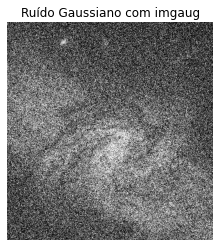

In [13]:
image = cv2.imread('imagens_originais/Fig0226(galaxy_pair_original).tif')
noise_model = iaa.AdditiveGaussianNoise(loc=0, scale=0.5*255) # 
noise_image = noise_model.augment_image(image)

plt.axis('off')
plt.title('Ruído Gaussiano com imgaug')
plt.imshow(noise_image, cmap='gray');

### 2.2. Redução do Ruído pelas Médias <br>


In [17]:
noise_image = []
for i in range(0,100):
    noise_image.append(noise_model.augment_image(image))

In [18]:
noise_image = np.array(noise_image)
noise_image = noise_image.astype(np.uint16)

noise_img_5 = sum(noise_image[0:5]) // len(noise_image[0:5])
noise_img_10 = sum(noise_image[0:10]) // len(noise_image[0:10])
noise_img_20 = sum(noise_image[0:20]) // len(noise_image[0:20])
noise_img_50 = sum(noise_image[0:50]) // len(noise_image[0:50])
noise_img_100 = sum(noise_image) // len(noise_image)

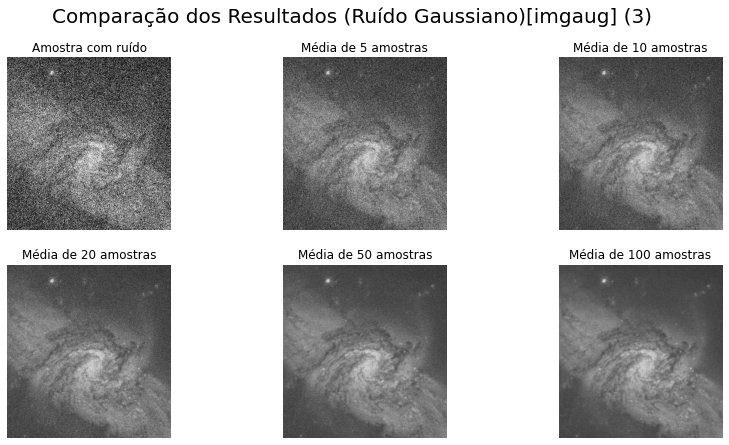

In [19]:
fig = plt.figure(figsize=(14,7))

fig.add_subplot(2,3,1); plt.axis('off')
plt.title('Amostra com ruído')
plt.imshow(noise_image[0])

fig.add_subplot(2,3,2); plt.axis('off')
plt.title('Média de 5 amostras')
plt.imshow(noise_img_5)

fig.add_subplot(2,3,3); plt.axis('off')
plt.title('Média de 10 amostras')
plt.imshow(noise_img_10)

fig.add_subplot(2,3,4); plt.axis('off')
plt.title('Média de 20 amostras')
plt.imshow(noise_img_20)

fig.add_subplot(2,3,5); plt.axis('off')
plt.title('Média de 50 amostras')
plt.imshow(noise_img_50)

fig.add_subplot(2,3,6); plt.axis('off')
plt.title('Média de 100 amostras')
plt.imshow(noise_img_100)

fig.suptitle('Comparação dos Resultados (Ruído Gaussiano)[imgaug] (3)', fontsize=20)
plt.show();

### 2.3. Adicionando Ruído Sal e Pimenta 

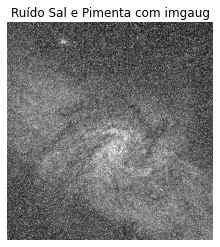

In [20]:
noise_model = iaa.SaltAndPepper(p=0.4)
noise_image = noise_model.augment_image(image)

plt.axis('off')
plt.title('Ruído Sal e Pimenta com imgaug')
plt.imshow(noise_image, cmap='gray');

### 2.4. Redução do Ruídos pelas Médias

In [21]:
noise_image = []
for i in range(0,100):
    noise_image.append(noise_model.augment_image(image))

In [22]:
noise_image = np.array(noise_image)
noise_image = noise_image.astype(np.uint16)

noise_img_5 = sum(noise_image[0:5]) // len(noise_image[0:5])
noise_img_10 = sum(noise_image[0:10]) // len(noise_image[0:10])
noise_img_20 = sum(noise_image[0:20]) // len(noise_image[0:20])
noise_img_50 = sum(noise_image[0:50]) // len(noise_image[0:50])
noise_img_100 = sum(noise_image) // len(noise_image)

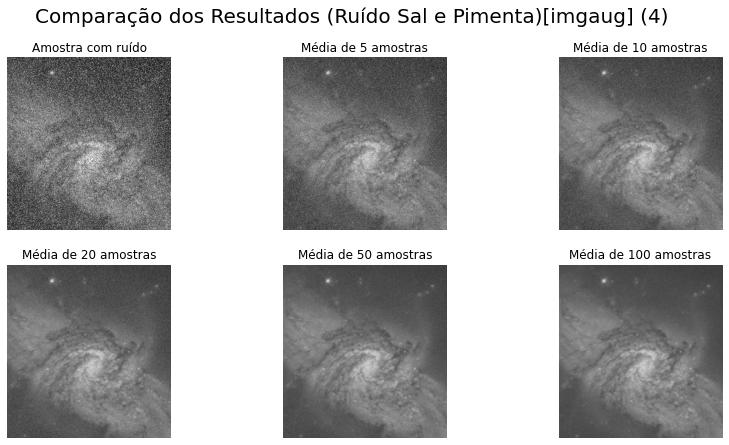

In [24]:
fig = plt.figure(figsize=(14,7))

fig.add_subplot(2,3,1); plt.axis('off')
plt.title('Amostra com ruído')
plt.imshow(noise_image[0])

fig.add_subplot(2,3,2); plt.axis('off')
plt.title('Média de 5 amostras')
plt.imshow(noise_img_5)

fig.add_subplot(2,3,3); plt.axis('off')
plt.title('Média de 10 amostras')
plt.imshow(noise_img_10)

fig.add_subplot(2,3,4); plt.axis('off')
plt.title('Média de 20 amostras')
plt.imshow(noise_img_20)

fig.add_subplot(2,3,5); plt.axis('off')
plt.title('Média de 50 amostras')
plt.imshow(noise_img_50)

fig.add_subplot(2,3,6); plt.axis('off')
plt.title('Média de 100 amostras')
plt.imshow(noise_img_100)

fig.suptitle('Comparação dos Resultados (Ruído Sal e Pimenta)[imgaug] (4)', fontsize=20)
plt.show();